author : sybyeon1102@gmail.com

<a href="https://ordo.tistory.com/103?category=732886">[Python] 회귀분석(Regression Analysis) [회귀식 추정, 회귀모형 검정, 적합도 파악]</a>

<a href="https://ordo.tistory.com/100?category=732886">[Python] 상관분석(Correlation Analysis), [산점도, 공분산, 상관계수, 검정]</a>

## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [24]:
from sklearn.linear_model import LinearRegression

In [39]:
import statsmodels.api as sm

# 데이터 불러오기

In [2]:
data = pd.read_csv('./data/국민건강보험공단_건강검진정보_20211229.CSV', encoding='euc-kr')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [3]:
samples = data.loc[:1000, ['허리둘레', '식전혈당(공복혈당)']]
samples

,허리둘레,식전혈당(공복혈당)
0,72.1,90.0
1,81.0,87.0
2,70.0,102.0
3,90.8,146.0
4,75.2,110.0
...,...,...
996,88.0,100.0
997,80.2,99.0
998,79.5,107.0
999,86.0,117.0


In [4]:
samples.dropna(inplace=True)

In [5]:
x = samples['허리둘레'].values
y = samples['식전혈당(공복혈당)'].values

In [6]:
x[:10], y[:10]

(array([72.1, 81. , 70. , 90.8, 75.2, 94. , 93. , 92. , 82. , 71.2]),
 array([ 90.,  87., 102., 146., 110.,  86., 250.,  93., 104.,  85.]))

# 상관분석

## 공분산 및 상관계수

In [7]:
np.cov(x, y)

array([[ 89.95481133,  44.50123674],
       [ 44.50123674, 556.88296178]])

In [8]:
crr = np.corrcoef(x, y)
crr

array([[1.        , 0.19882817],
       [0.19882817, 1.        ]])

=> 약한 양적 상관관계

<a href="https://sunnyyanolza.tistory.com/42">_06. 피어슨 상관 계수(Pearson correlation coefficient 또는 Pearson's r)</a>

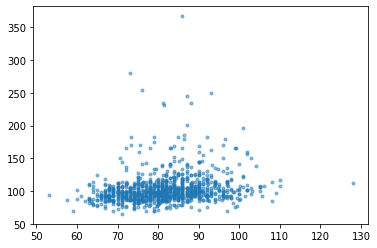

In [9]:
plt.scatter(x, y, alpha=0.5, marker='.')

## 이상치제거

{'whiskers': [<matplotlib.lines.Line2D at 0x1fe80cca130>,
 'caps': [<matplotlib.lines.Line2D at 0x1fe80cca790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fe80cb6e20>,
 'medians': [<matplotlib.lines.Line2D at 0x1fe80ccac70>,
 'fliers': [<matplotlib.lines.Line2D at 0x1fe80ccaf40>,
 'means': []}

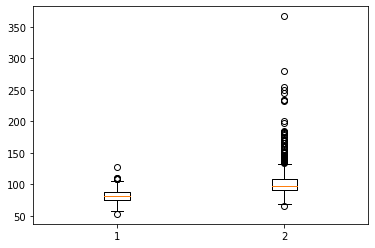

In [10]:
plt.boxplot(samples)

In [11]:
desc = samples.describe()
desc

,허리둘레,식전혈당(공복혈당)
count,992.000000,992.000000
mean,81.698589,103.089718
std,9.484451,23.598368
min,53.000000,65.000000
25%,75.000000,91.000000
50%,81.500000,98.000000
75%,88.000000,108.000000
max,128.000000,367.000000


In [12]:
# 허리둘레
q1, q3 = 75, 88
iqr = q3 - q1
lw = q1 - 1.5*iqr
uw = q3 + 1.5*iqr
lw, uw

(55.5, 107.5)

In [13]:
ol_waist = samples[(samples['허리둘레'] < lw) | (samples['허리둘레'] > uw)].index
ol_waist

Int64Index([23, 150, 202, 305, 373, 524, 852], dtype='int64')

In [14]:
# 공복혈당
q1, q3 = 91, 108
iqr = q3 - q1
lw = q1 - 1.5*iqr
uw = q3 + 1.5*iqr
lw, uw

(65.5, 133.5)

In [15]:
ol_glucose = samples[(samples['식전혈당(공복혈당)'] < lw) | (samples['식전혈당(공복혈당)'] > uw)].index
ol_glucose

Int64Index([  3,   6,  26,  60,  67,  77,  79, 102, 124, 125, 129, 140, 154,
            160, 163, 170, 199, 205, 221, 226, 235, 240, 245, 246, 256, 263,
            280, 293, 318, 361, 396, 452, 455, 468, 494, 509, 516, 543, 569,
            588, 616, 638, 668, 669, 699, 704, 706, 722, 726, 733, 747, 774,
            786, 805, 806, 810, 814, 864, 882, 892, 905, 914, 923, 933, 936,
            959, 987],
           dtype='int64')

In [16]:
samples_r1 = samples.drop(index=ol_waist)
samples_r1.drop(index=ol_glucose, inplace=True)
samples_r1

,허리둘레,식전혈당(공복혈당)
0,72.1,90.0
1,81.0,87.0
2,70.0,102.0
4,75.2,110.0
5,94.0,86.0
...,...,...
996,88.0,100.0
997,80.2,99.0
998,79.5,107.0
999,86.0,117.0


In [17]:
xr1 = samples_r1['허리둘레'].values
yr1 = samples_r1['식전혈당(공복혈당)'].values

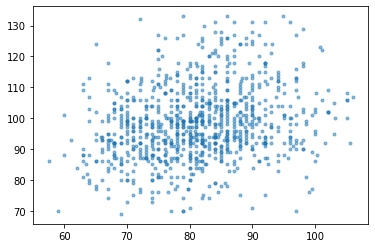

In [18]:
plt.scatter(xr1, yr1, marker='.', alpha=0.5)

## 다시 상관계수

In [19]:
crrr1 = np.corrcoef(xr1, yr1)
crrr1

array([[1.        , 0.23391223],
       [0.23391223, 1.        ]])

In [20]:
f'처리전 : {crr[1, 0]:.4f}, 처리후 : {crrr1[1, 0]:.4f}'

'처리전 : 0.1988, 처리후 : 0.2339'

=> 약한 양적 상관관계 (0.1 - 0.3)

## 상관계수의 검정

In [21]:
import scipy.stats as stats
_, p_value = stats.pearsonr(xr1, yr1)
p_value # 양측검정, p-value

7.108229195565518e-13

- p-value < 유의수준 : 귀무가설(상관관계가 없다.) 기각

# 회귀분석

In [23]:
samples_r1.info()
samples_r1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   허리둘레        918 non-null    float64
 1   식전혈당(공복혈당)  918 non-null    float64
dtypes: float64(2)
memory usage: 21.5 KB


,허리둘레,식전혈당(공복혈당)
0,72.1,90.0
1,81.0,87.0
2,70.0,102.0
4,75.2,110.0
5,94.0,86.0


In [27]:
xr1[:10], yr1[:10]

(array([72.1, 81. , 70. , 75.2, 94. , 92. , 82. , 71.2, 84. , 63. ]),
 array([ 90.,  87., 102., 110.,  86.,  93., 104.,  85.,  92.,  90.]))

## 회귀식의 추정

In [25]:
lr = LinearRegression()

In [28]:
lr.fit(xr1.reshape(-1, 1), yr1.reshape(-1, 1))

LinearRegression()

In [31]:
a, b = lr.coef_[0][0], lr.intercept_[0]
a, b

(0.3067564795714989, 73.45724649921735)

In [32]:
yr1_pred = a*xr1 + b
yr1_pred[:10]

array([ 95.57438868,  98.30452134,  94.93020007,  96.52533376,
       102.29235558, 101.67884262,  98.61127782,  95.29830784,
        99.22479078,  92.78290471])

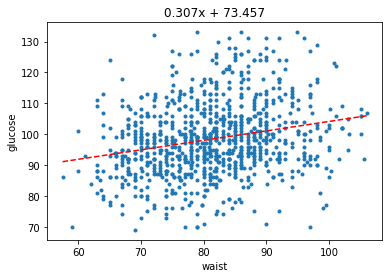

In [36]:
plt.scatter(xr1, yr1, marker='.')

xs = np.linspace(xr1.min(), xr1.max(), 100)
ys = a*xs + b
plt.plot(xs, ys, ls='--', color='red')

plt.title(f'{a:.3f}x + {b:.3f}')
plt.xlabel('waist')
plt.ylabel('glucose')

plt.show()

## 회귀모형의 검정 및 적합도 파악

In [40]:
results = sm.OLS(yr1, sm.add_constant(xr1)).fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     53.02
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           7.11e-13
Time:                        09:45:54   Log-Likelihood:                -3551.5
No. Observations:                 918   AIC:                             7107.
Df Residuals:                     916   BIC:                             7117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.4572      3.443     21.337      0.000      66.701      80.214
x1             0.3068      0.042      7.281      0.000       0.224       0.389
==============================================================================
Omnibus:                       22.131   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.079
Skew:                           0.378   Prob(JB):                     9.74e-06
Kurtosis:                       3.179   Cond. No.                         735.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### F-statistic
- Prob (F-statistic):	7.11e-13 -> 유의 수준보다 낮아 회귀분석 모델 전체에 대해 통계적으로 의미가 있다.

### p-value
- const, P>|t| : 0.000 -> 유의수준보다 낮아 target설명에 유의

### R-squared
- R-squared:	0.055
- Adj. R-squared:	0.054
- 5%의 설명력